<a href="https://colab.research.google.com/github/yatinahujaahahaha/Unemployment-during-Recessions-A-Comparative-Analysis-of-the-Demographic-Disparities-across-Europe/blob/main/CodeSubmission_Visuals_Thesis_Yatin_COB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch


In [2]:
from google.colab import files

uploaded = files.upload()


Saving estat_lfsq_urgacob.tsv to estat_lfsq_urgacob.tsv


In [3]:
# Step 1: Reading the TSV file
df = pd.read_csv("estat_lfsq_urgacob.tsv", sep="\t")

# Step 2: Spliting the combined column
# The first column has metadata: freq, unit, sex, age, c_birth, geo
df[['freq', 'c_birth', 'sex', 'age', 'unit', 'geo']] = df.iloc[:, 0].str.split(",", expand=True)

# Step 3: Renaming and reshaping
# Droping the original combined column (now redundant)
df = df.drop(columns=df.columns[0])

# Step 4: Melting the quarter columns into long format
df_long = df.melt(
    id_vars=['freq', 'unit', 'sex', 'age', 'c_birth', 'geo'],
    var_name='time_period',
    value_name='unemployment_raw'
)

# Step 5: Extracting numeric values
df_long['unemployment_rate'] = df_long['unemployment_raw'].str.extract(r'([0-9.]+)').astype(float)

# Step 6: Droping missing rates
df_long = df_long.dropna(subset=['unemployment_rate'])

# Step 7: Preview of the cleaned data
df_long.head()



,freq,unit,sex,age,c_birth,geo,time_period,unemployment_raw,unemployment_rate
49,Q,PC,F,Y15-24,EU27_2020_FOR,EL,1998-Q1,52.1 bu,52.1
50,Q,PC,F,Y15-24,EU27_2020_FOR,ES,1998-Q1,63.1 u,63.1
87,Q,PC,F,Y15-39,EU27_2020_FOR,EL,1998-Q1,30.2 b,30.2
88,Q,PC,F,Y15-39,EU27_2020_FOR,ES,1998-Q1,35.0,35.0
91,Q,PC,F,Y15-39,EU27_2020_FOR,FR,1998-Q1,14.9,14.9


In [4]:
recessions = [("2008-Q3","2009-Q4"), ("2011-Q3","2013-Q2"), ("2020-Q1","2021-Q2")]

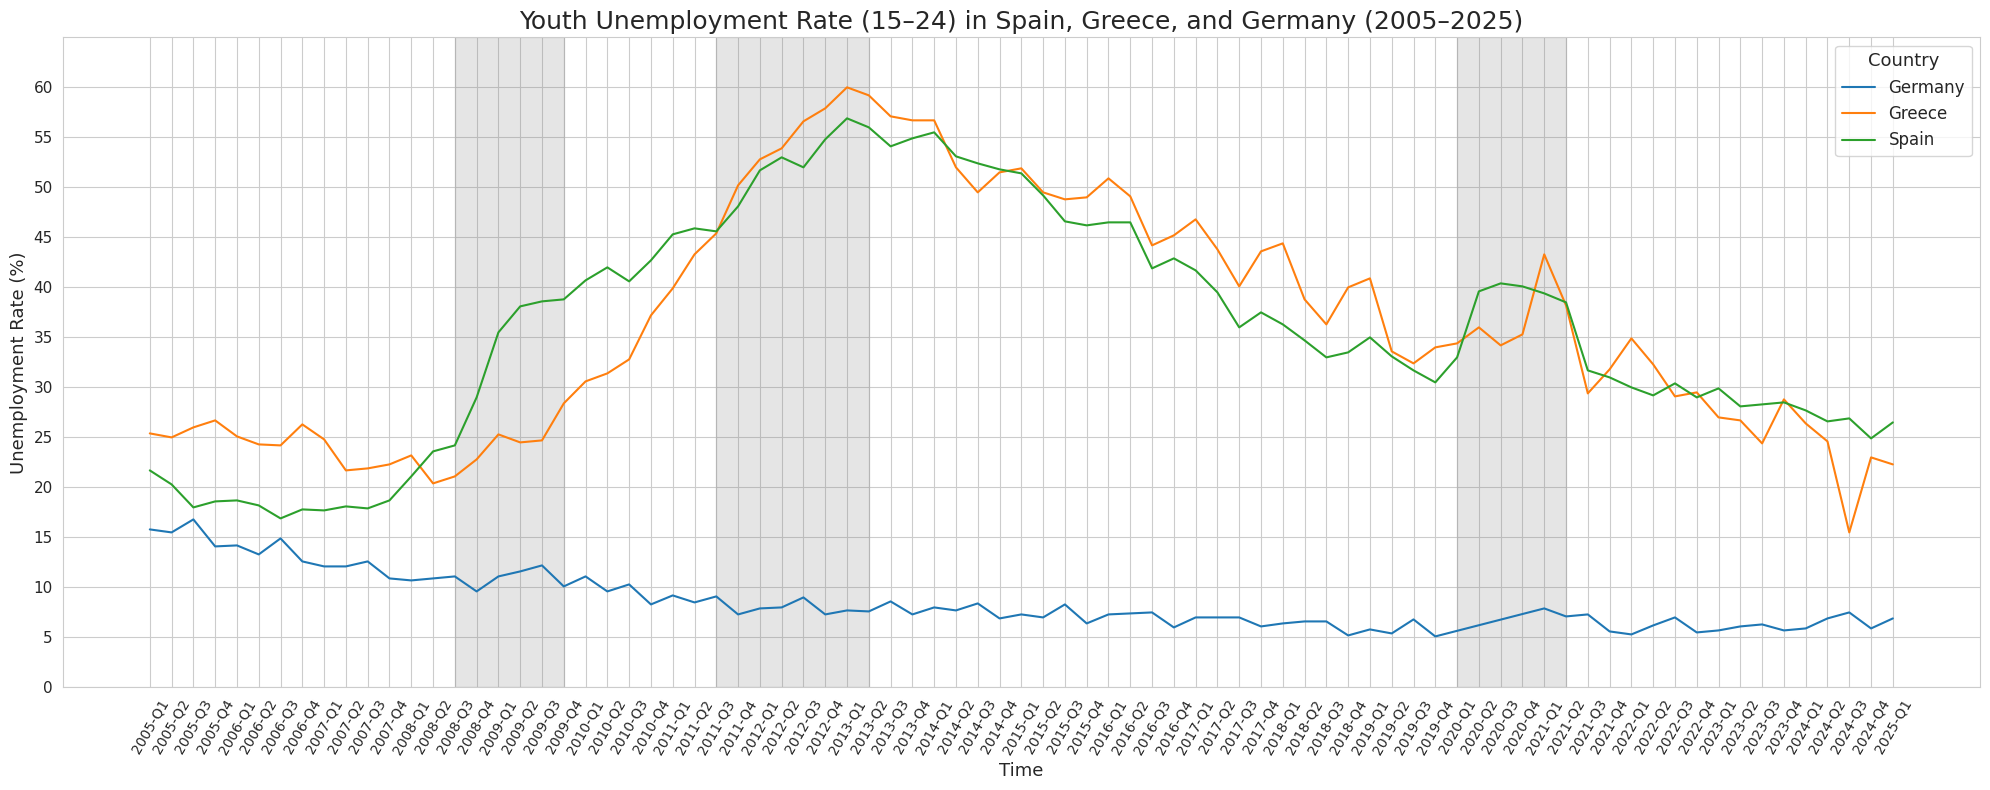

In [5]:
# Figure 1

# 1. Filtering
df_filtered = df_long[
    (df_long.geo.isin(['ES','EL','DE'])) &
    (df_long.sex == 'T') &
    (df_long.age == 'Y15-24') &
    (df_long.c_birth == 'TOTAL') &
    (df_long.time_period >= '2005-Q1')        # keeping as needed
].copy()

# label column for legend
label_map = {'ES':'Spain','EL':'Greece','DE':'Germany'}
df_filtered['LegendLabel'] = df_filtered['geo'].map(label_map)

# 2. Sorting quarters
df_filtered['time_period'] = df_filtered['time_period'].astype(str).str.strip()
cats = sorted(
    df_filtered['time_period'].unique(),
    key=lambda x: (int(x[:4]), int(x.split('-Q')[1]))
)

# 3. Numeric index for each quarter
time_to_idx = {q: i for i, q in enumerate(cats)}
df_filtered['time_idx'] = df_filtered['time_period'].map(time_to_idx)
X = np.arange(len(cats))

# 4. Styles and y-axis
styles = {'Spain':'solid','Greece':'solid','Germany':'solid'}
y_min = 0
y_max = float(df_filtered['unemployment_rate'].max()) + 5
y_ticks = np.arange(y_min, y_max, 5)

# 5. Plot lines
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
for key, g in df_filtered.groupby('LegendLabel'):
    plt.plot(
        g['time_idx'],
        g['unemployment_rate'],
        label=key,
        linestyle=styles.get(key, 'solid')
    )

# 6. Shade recession periods
for start, end in recessions:
    if (start in time_to_idx) and (end in time_to_idx):
        s = time_to_idx[start]
        e = time_to_idx[end]
        mask = (X >= s) & (X <= e)
        plt.fill_between(X, y_min, y_max, where=mask, color='gray', alpha=0.2)

# 7. X-axis labels
plt.xticks(range(len(cats)), cats, rotation=60, fontsize=10)

# 8. Final formatting (titles/labels per figure)
plt.yticks(y_ticks, fontsize=11)
plt.ylim(y_min, y_max)
plt.title('Youth Unemployment Rate (15–24) in Spain, Greece, and Germany (2005–2025)', fontsize=18)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Unemployment Rate (%)', fontsize=13)
plt.legend(title='Country', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.grid(True)
plt.show()


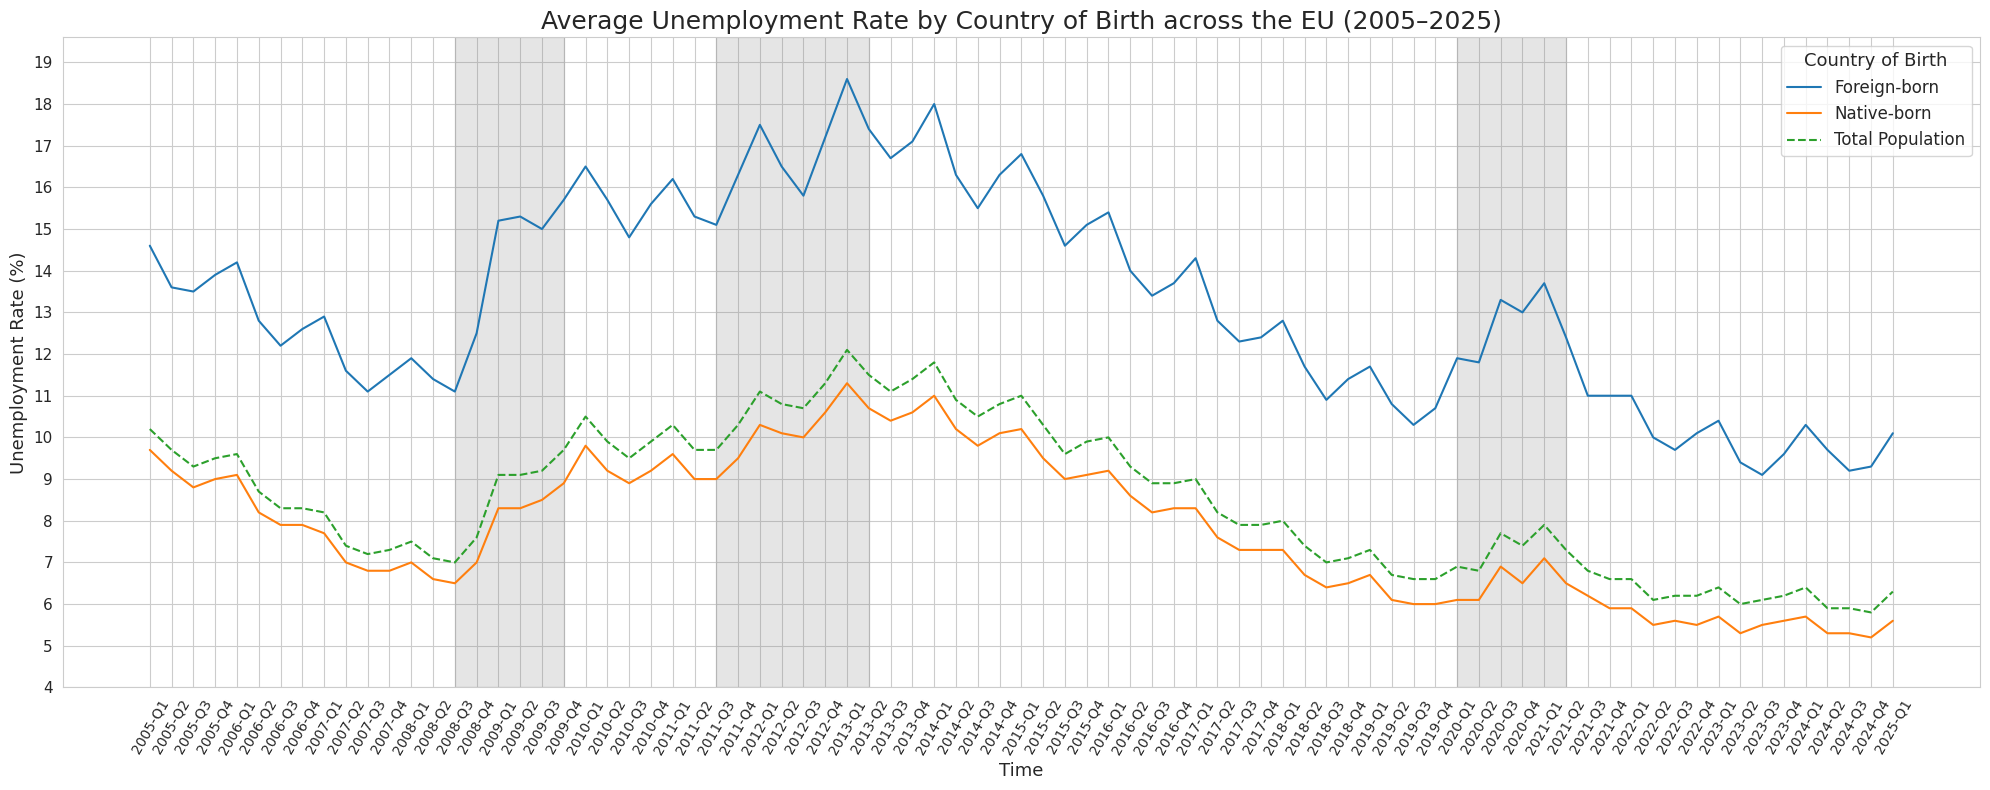

In [6]:
# Figure 2


# 1. Filtering
df_filtered = df_long[
    (df_long.geo == 'EU27_2020') &
    (df_long.sex == 'T') &
    (df_long.age == 'Y15-64') &
    (df_long.c_birth.isin(['FOR','NAT','TOTAL'])) &
    (df_long.time_period >= '2005-Q1')
].copy()

# 2. Legend labels
label_map = {'FOR':'Foreign‑born','NAT':'Native‑born','TOTAL':'Total Population'}
df_filtered['LegendLabel'] = df_filtered['c_birth'].map(label_map)

# 3. Sorting quarters
df_filtered['time_period'] = df_filtered['time_period'].astype(str).str.strip()
cats = sorted(
    df_filtered['time_period'].unique(),
    key=lambda x: (int(x[:4]), int(x.split('-Q')[1]))
)

# 4. Numeric index
time_to_idx = {q: i for i, q in enumerate(cats)}
df_filtered['time_idx'] = df_filtered['time_period'].map(time_to_idx)
X = np.arange(len(cats))

# 5. Styles and y-axis
styles = {'Foreign‑born':'solid','Native‑born':'solid','Total Population':'dashed'}
y_min = 4
y_max = float(df_filtered['unemployment_rate'].max()) + 1
y_ticks = np.arange(y_min, y_max, 1)

# 6. Plot lines
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))
for key, g in df_filtered.groupby('LegendLabel'):
    plt.plot(
        g['time_idx'],
        g['unemployment_rate'],
        label=key,
        linestyle=styles.get(key, 'solid')
    )

# 7. Shade recessions

for start, end in recessions:
    if (start in time_to_idx) and (end in time_to_idx):
        s = time_to_idx[start]
        e = time_to_idx[end]
        mask = (X >= s) & (X <= e)
        plt.fill_between(X, y_min, y_max, where=mask, color='gray', alpha=0.2)

# 8. X-axis labels
plt.xticks(range(len(cats)), cats, rotation=60, fontsize=10)

# 9. Final formatting
plt.yticks(y_ticks, fontsize=11)
plt.ylim(y_min, y_max)
plt.title('Average Unemployment Rate by Country of Birth across the EU (2005–2025)', fontsize=18)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Unemployment Rate (%)', fontsize=13)
plt.legend(title='Country of Birth', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.grid(True)
plt.show()


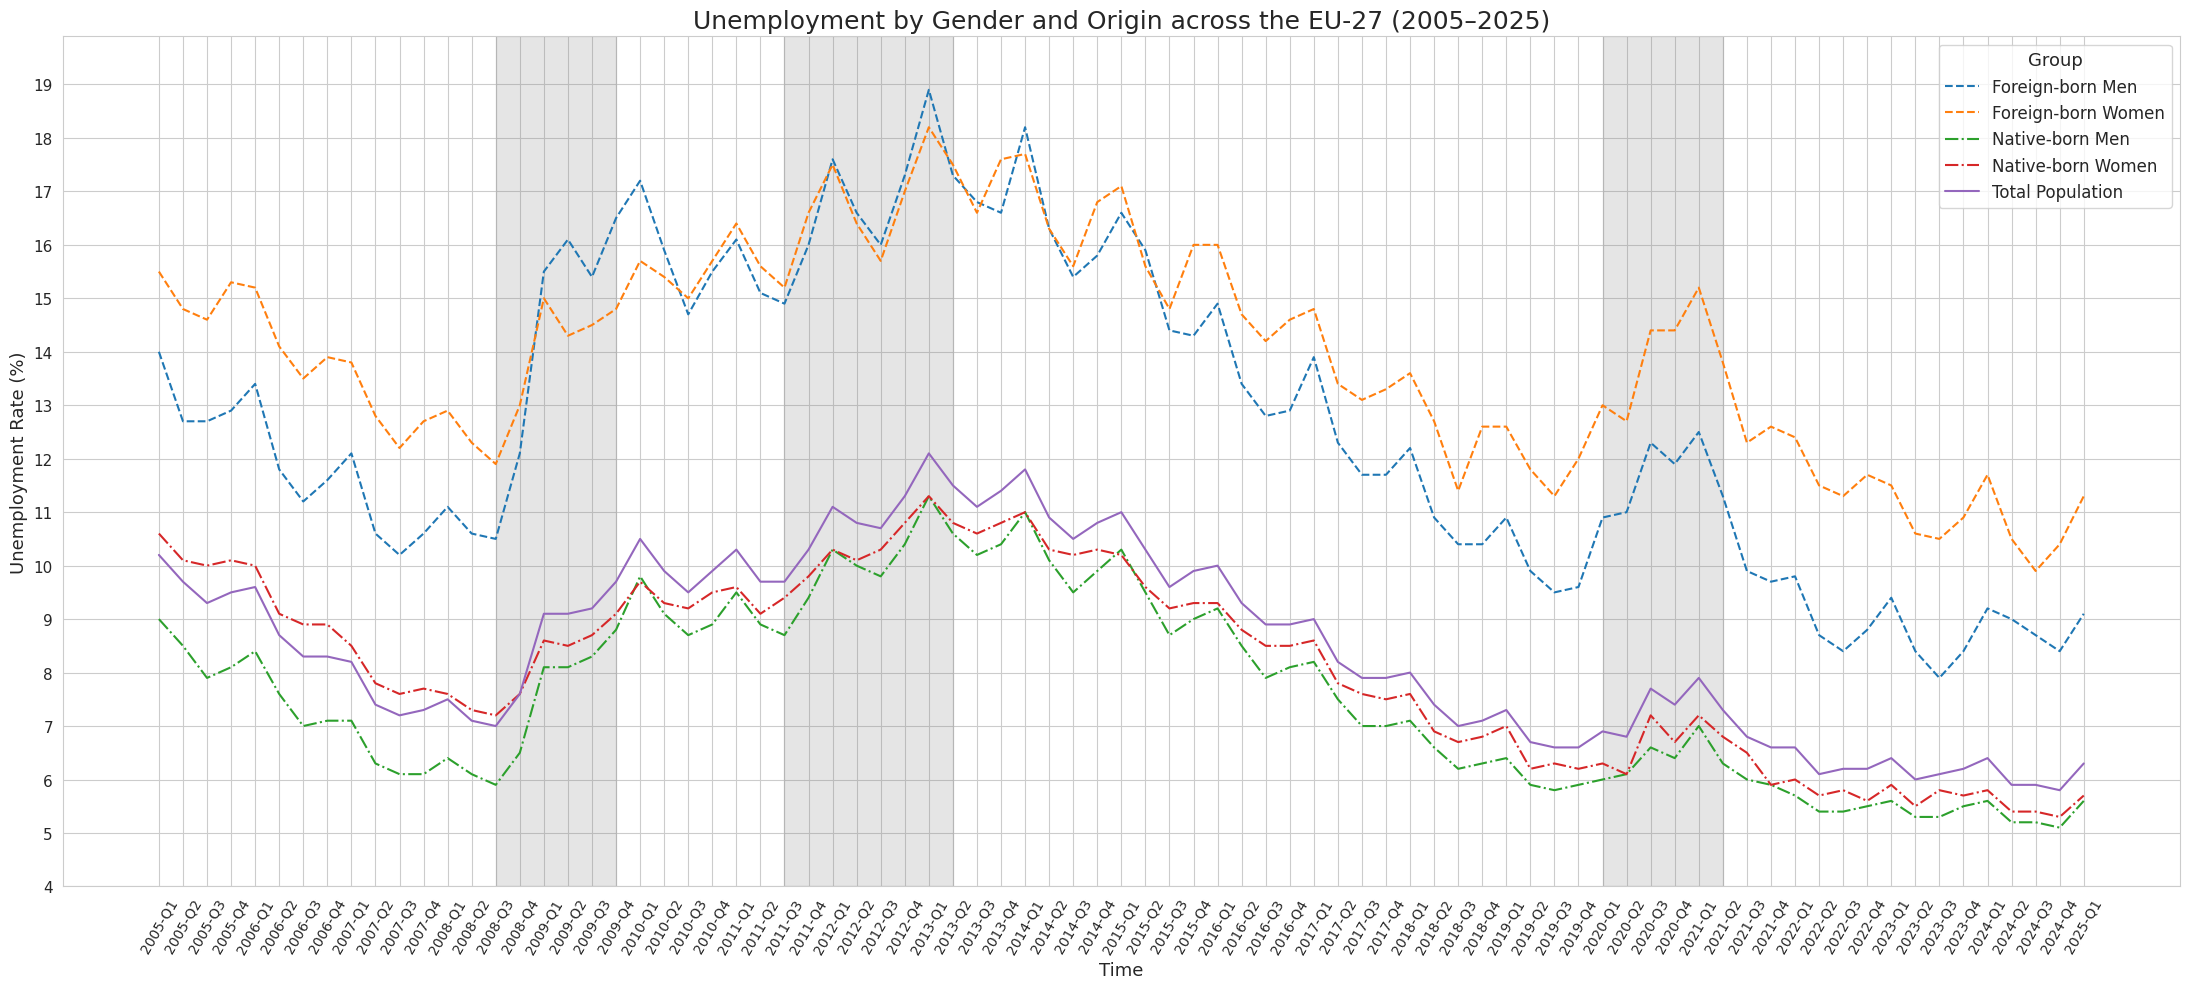

In [7]:
# Figure 3

# 1. Filtering: EU27_2020, working-age, sex disaggregated
df_filtered = df_long[
    (df_long.geo == 'EU27_2020') &
    (df_long.age == 'Y15-64') &
    (
        ((df_long.c_birth == 'FOR') & df_long.sex.isin(['F', 'M'])) |
        ((df_long.c_birth == 'NAT') & df_long.sex.isin(['F', 'M'])) |
        ((df_long.c_birth == 'TOTAL') & (df_long.sex == 'T'))
    ) &
    (df_long.time_period >= '2005-Q1')
].copy()

# 2. Assigning group labels
def label_group(row):
    if row.c_birth == 'FOR' and row.sex == 'F': return 'Foreign-born Women'
    if row.c_birth == 'FOR' and row.sex == 'M': return 'Foreign-born Men'
    if row.c_birth == 'NAT' and row.sex == 'F': return 'Native-born Women'
    if row.c_birth == 'NAT' and row.sex == 'M': return 'Native-born Men'
    return 'Total Population'

df_filtered['Group'] = df_filtered.apply(label_group, axis=1)

# 3. Sorting and numerical quarter indexing
df_filtered['time_period'] = df_filtered['time_period'].str.strip()
cats = sorted(
    df_filtered['time_period'].unique(),
    key=lambda x: (int(x[:4]), int(x.split('-Q')[1]))
)

time_to_idx = {q: i for i, q in enumerate(cats)}
df_filtered['time_idx'] = df_filtered['time_period'].map(time_to_idx)
X = np.arange(len(cats))

# 4. Line styles
styles = {
    'Foreign-born Women': 'dashed',
    'Foreign-born Men': 'dashed',
    'Native-born Women': 'dashdot',
    'Native-born Men': 'dashdot',
    'Total Population': 'solid'
}

# 5. Y-axis
y_min = 4
y_max = df_filtered.unemployment_rate.max() + 1
y_ticks = np.arange(y_min, y_max, 1)

# 6. Plot
sns.set_style("whitegrid")
plt.figure(figsize=(22, 10))
for grp, grp_df in df_filtered.groupby('Group'):
    plt.plot(
        grp_df['time_idx'],
        grp_df['unemployment_rate'],
        label=grp,
        linestyle=styles[grp]
    )

# 7. Shade recession periods
for start, end in recessions:
    s = time_to_idx[start]
    e = time_to_idx[end]
    mask = (X >= s) & (X <= e)
    plt.fill_between(X, y_min, y_max, where=mask, color='gray', alpha=0.2)

# 8. X-axis labels
ticks = list(range(len(cats)))
labels = cats
plt.xticks(ticks, labels, rotation=60, fontsize=10)

# 9. Final formatting
plt.yticks(y_ticks, fontsize=11)
plt.ylim(y_min, y_max)
plt.title('Unemployment by Gender and Origin across the EU-27 (2005–2025)', fontsize=18)
plt.xlabel('Time', fontsize=13)
plt.ylabel('Unemployment Rate (%)', fontsize=13)
plt.legend(title='Group', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.grid(True)
plt.show()






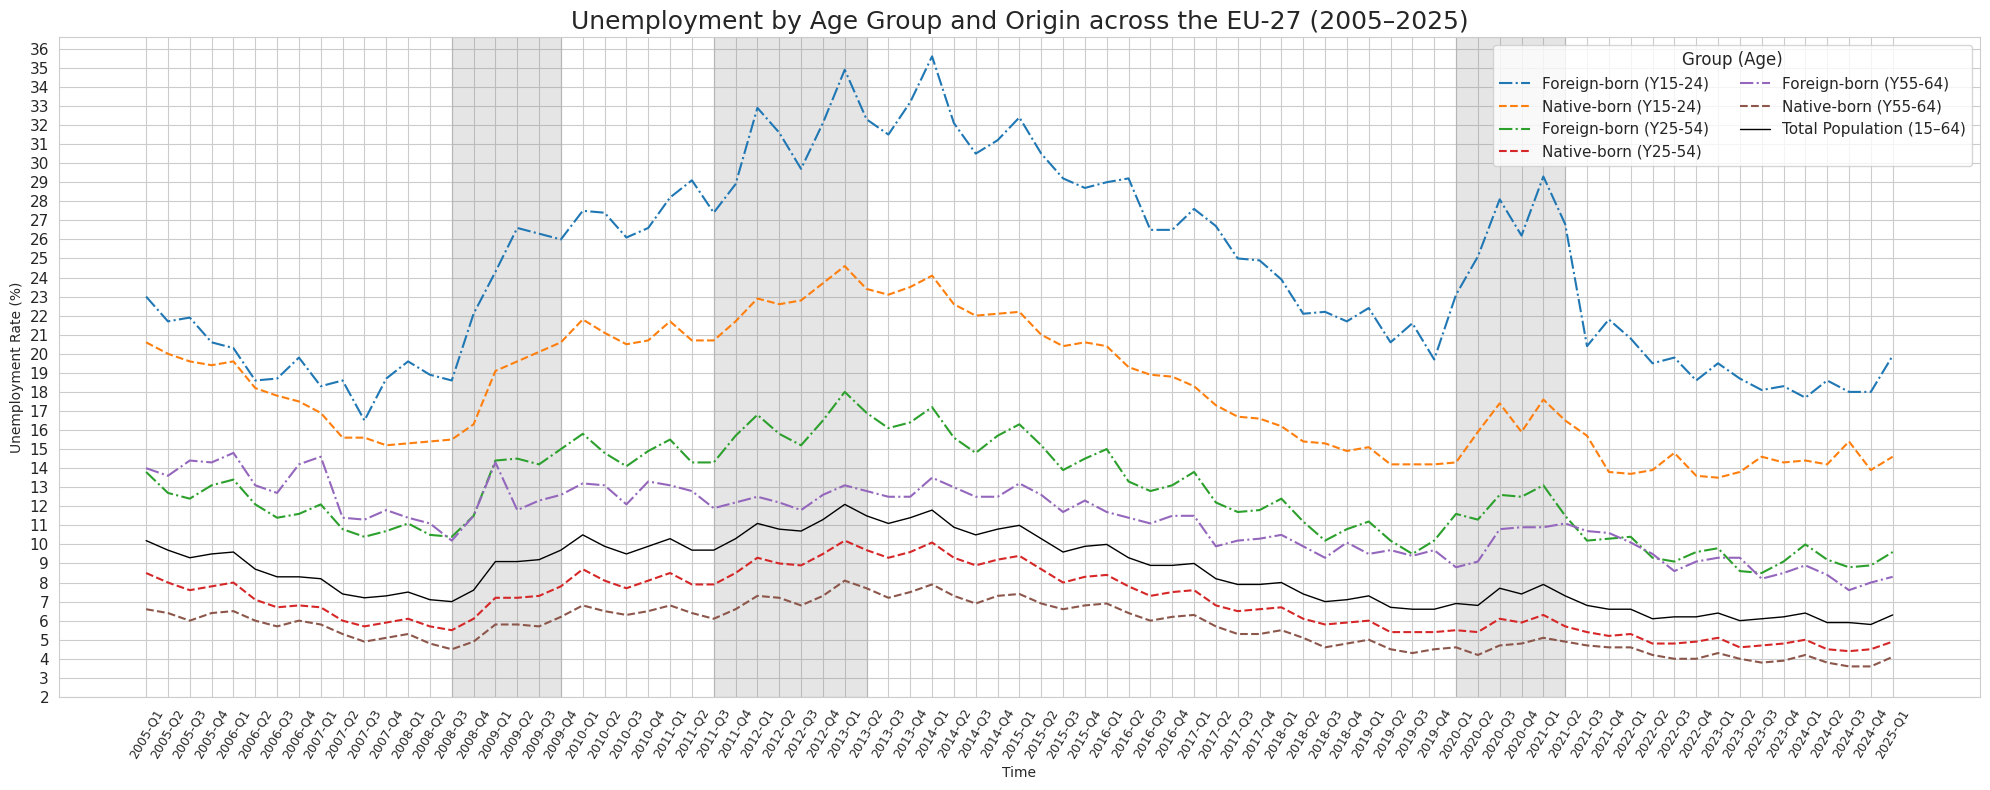

In [10]:
# Figure 4

foreign_native_ages = ['Y15-24', 'Y25-54', 'Y55-64']
total_age = 'Y15-64'
TOTAL_CODE = 'TOTAL'  # keep as TOTAL

# 1. Base filter
df_base = df_long[
    (df_long.geo == 'EU27_2020') &
    (df_long.sex == 'T') &
    (df_long.time_period >= '2005-Q1')
].copy()

# 2. Parts (FOR/NAT × three age bands) and Total (TOTAL × Y15-64)
df_parts = df_base[
    (df_base.c_birth.isin(['FOR','NAT'])) &
    (df_base.age.isin(foreign_native_ages))
].copy()

df_total = df_base[
    (df_base.c_birth == TOTAL_CODE) &
    (df_base.age == total_age)
].copy()

# 3. Legend labels
origin_map = {'FOR':'Foreign-born', 'NAT':'Native-born', TOTAL_CODE:'Total Population'}
for df_ in (df_parts, df_total):
    df_['LegendLabel'] = df_['c_birth'].map(origin_map) + ' (' + df_['age'] + ')'
    df_['Origin'] = df_['c_birth'].map(origin_map)
    df_['time_period'] = df_['time_period'].astype(str).str.strip()

# 4. Shared quarter index
quarters = sorted(
    pd.concat([df_parts['time_period'], df_total['time_period']]).unique(),
    key=lambda x: (int(x[:4]), int(x.split('-Q')[1]))
)
time_to_idx = {q: i for i, q in enumerate(quarters)}
for df_ in (df_parts, df_total):
    df_['time_idx'] = df_['time_period'].map(time_to_idx)
X = np.arange(len(quarters))

# 5. Styles and y-axis
styles = {
    ('Foreign-born','Y15-24'):'dashdot',
    ('Foreign-born','Y25-54'):'dashdot',
    ('Foreign-born','Y55-64'):'dashdot',
    ('Native-born','Y15-24'):'dashed',
    ('Native-born','Y25-54'):'dashed',
    ('Native-born','Y55-64'):'dashed',
    ('Total Population','Y15-64'):'solid',
}
y_min = 2
y_max = float(max(
    df_parts['unemployment_rate'].max() if not df_parts.empty else 0,
    df_total['unemployment_rate'].max() if not df_total.empty else 0
)) + 1
y_ticks = np.arange(y_min, y_max, 1)

# 6. Plot lines
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

# FOR/NAT lines per age
for (age, origin), g in df_parts.groupby(['age','Origin']):
    plt.plot(
        g['time_idx'],
        g['unemployment_rate'],
        linestyle=styles[(origin, age)],
        label=f"{origin} ({age})"
    )

# Total line
if not df_total.empty:
    g = df_total.sort_values('time_idx')
    plt.plot(
        g['time_idx'],
        g['unemployment_rate'],
        linestyle=styles[('Total Population', total_age)],
        linewidth=1, color='black', label='Total Population (15–64)', zorder=5
    )

# 7. Shade recessions

for start, end in recessions:
    if (start in time_to_idx) and (end in time_to_idx):
        s = time_to_idx[start]
        e = time_to_idx[end]
        mask = (X >= s) & (X <= e)
        plt.fill_between(X, y_min, y_max, where=mask, color='gray', alpha=0.2)

# 8. Axes/legend
plt.xticks(list(range(len(quarters))), quarters, rotation=60, fontsize=9)
plt.yticks(y_ticks, fontsize=11)
plt.ylim(y_min, y_max)
plt.title('Unemployment by Age Group and Origin across the EU-27 (2005–2025)', fontsize=18)
plt.xlabel('Time'); plt.ylabel('Unemployment Rate (%)')

plt.legend(title="Group (Age)", ncol=2, fontsize=11, title_fontsize=12, loc="upper right")

plt.tight_layout(); plt.grid(True); plt.show()




In [12]:
#Extra Helper code to extract values, can also be directly read from the dataset
#recession windows (start, end)
recessions = {
    'GFC':       ('2008-Q3', '2009-Q4'),
    'Eurozone':  ('2011-Q3', '2013-Q2'),
    'COVID-19':  ('2020-Q1', '2021-Q2'),
}

#Age bins of interest
age_bins = ['Y15-24', 'Y25-54', 'Y55-64']

# 1) filtering base data
df_long['time_period'] = df_long['time_period'].astype(str).str.strip()

df_base = df_long[
    (df_long['geo'] == 'EU27_2020') &
    (df_long['sex'] == 'T') &
    (df_long['c_birth'].isin(['FOR', 'NAT'])) &
    (df_long['age'].isin(age_bins))
].copy()

# 2) Collecting only recession start/end quarters that actually exist in your data
all_needed = sorted({q for pair in recessions.values() for q in pair})
available = set(df_base['time_period'].unique())
keep_quarters = [q for q in all_needed if q in available]

# 3) Pivot helper for any given quarter
def pivot_for_quarter(q):
    tmp = df_base[df_base['time_period'] == q]
    if tmp.empty:
        return None
    pvt = (tmp.pivot_table(index=['age'], columns='c_birth', values='unemployment_rate')
              .rename(columns={'FOR':'Foreign-born','NAT':'Native-born'}))
    pvt['Gap'] = pvt['Foreign-born'] - pvt['Native-born']
    pvt['Quarter'] = q
    return pvt.reset_index()

# 4) Building a summary per recession (start & end values)
rows = []
for name, (q_start, q_end) in recessions.items():
    p_start = pivot_for_quarter(q_start)
    p_end   = pivot_for_quarter(q_end)
    if p_start is None or p_end is None:
        continue
    # merge start & end on age
    merged = p_start.merge(p_end, on='age', suffixes=(' (start)', ' (end)'))
    merged.insert(0, 'Recession', name)
    rows.append(merged)

summary = pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

# 5) Reorder/rename columns nicely
if not summary.empty:
    summary = summary[[
        'Recession',
        'age',
        'Quarter (start)', 'Foreign-born (start)', 'Native-born (start)', 'Gap (start)',
        'Quarter (end)',   'Foreign-born (end)',   'Native-born (end)',   'Gap (end)'
    ]].rename(columns={'age':'Age'})

# 6) Pretty display
pd.options.display.float_format = "{:.2f}".format
summary

c_birth,Recession,Age,Quarter (start),Foreign-born (start),Native-born (start),Gap (start),Quarter (end),Foreign-born (end),Native-born (end),Gap (end)
0,GFC,Y15-24,2008-Q3,18.60,15.50,3.10,2009-Q4,26.00,20.60,5.40
1,GFC,Y25-54,2008-Q3,10.40,5.50,4.90,2009-Q4,15.00,7.80,7.20
2,GFC,Y55-64,2008-Q3,10.20,4.50,5.70,2009-Q4,12.60,6.20,6.40
3,Eurozone,Y15-24,2011-Q3,27.40,20.70,6.70,2013-Q2,32.30,23.40,8.90
4,Eurozone,Y25-54,2011-Q3,14.30,7.90,6.40,2013-Q2,16.90,9.70,7.20
5,Eurozone,Y55-64,2011-Q3,11.90,6.10,5.80,2013-Q2,12.80,7.70,5.10
6,COVID-19,Y15-24,2020-Q1,23.10,14.30,8.80,2021-Q2,26.80,16.50,10.30
7,COVID-19,Y25-54,2020-Q1,11.60,5.50,6.10,2021-Q2,11.50,5.70,5.80
8,COVID-19,Y55-64,2020-Q1,8.80,4.60,4.20,2021-Q2,11.10,4.90,6.20


In [14]:

# ----- start/end gaps  -----
data = {
    'Recession': ['GFC','GFC','GFC',
                  'Eurozone','Eurozone','Eurozone',
                  'COVID-19','COVID-19','COVID-19'],
    'Age group': ['15–24','25–54','55–64']*3,
    'Gap start (p.p.)': [3.10, 4.90, 5.70,
                         6.70, 6.40, 5.80,
                         8.80, 6.10, 4.20],
    'Gap end (p.p.)':   [5.40, 7.20, 6.40,
                         8.90, 7.20, 5.10,
                         10.30, 5.80, 6.20]
}

df = pd.DataFrame(data)

# Absolute and relative change
df['Absolute change (p.p.)'] = (df['Gap end (p.p.)'] - df['Gap start (p.p.)']).round(2)
df['Relative change (%)']    = ((df['Absolute change (p.p.)'] / df['Gap start (p.p.)']) * 100).round(0).astype(int)

# Ordering rows nicely
rec_order = {'GFC':0, 'Eurozone':1, 'COVID-19':2}
age_order = {'15–24':0, '25–54':1, '55–64':2}
df = (df
      .assign(_r=df['Recession'].map(rec_order),
              _a=df['Age group'].map(age_order))
      .sort_values(['_r','_a'])
      .drop(columns=['_r','_a'])
)



# Pretty formatting for display
df_display = df.copy()
for col in ['Gap start (p.p.)','Gap end (p.p.)','Absolute change (p.p.)']:
    df_display[col] = df_display[col].map(lambda x: f"{x:.2f}")
df_display['Relative change (%)'] = df_display['Relative change (%)'].map(lambda x: f"{x:+d}%")

print(df_display.to_string(index=False))



Recession Age group Gap start (p.p.) Gap end (p.p.) Absolute change (p.p.) Relative change (%)
      GFC     15–24             3.10           5.40                   2.30                +74%
      GFC     25–54             4.90           7.20                   2.30                +47%
      GFC     55–64             5.70           6.40                   0.70                +12%
 Eurozone     15–24             6.70           8.90                   2.20                +33%
 Eurozone     25–54             6.40           7.20                   0.80                +12%
 Eurozone     55–64             5.80           5.10                  -0.70                -12%
 COVID-19     15–24             8.80          10.30                   1.50                +17%
 COVID-19     25–54             6.10           5.80                  -0.30                 -5%
 COVID-19     55–64             4.20           6.20                   2.00                +48%


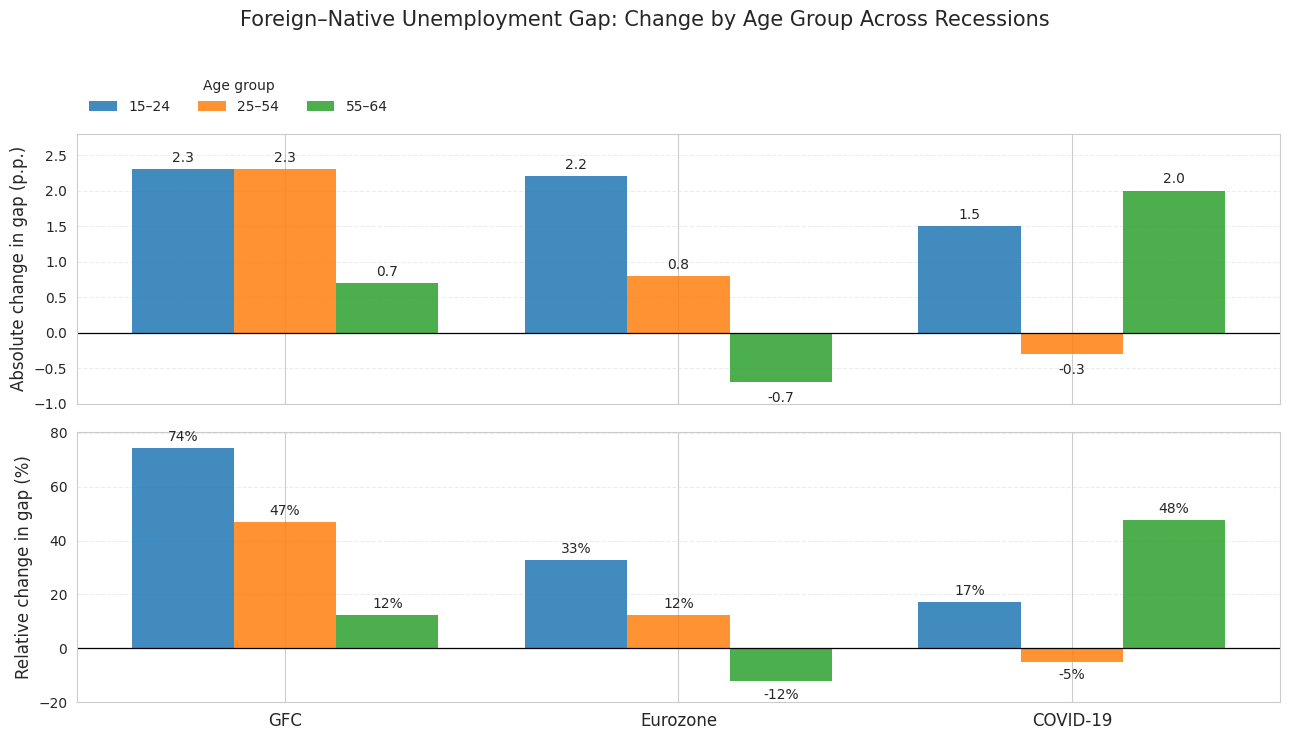

In [15]:
# Figure 5

# Recession gap table (start/end)
data = {
    'Recession': ['GFC','GFC','GFC',
                  'Eurozone','Eurozone','Eurozone',
                  'COVID-19','COVID-19','COVID-19'],
    'Age': ['Y15-24','Y25-54','Y55-64']*3,
    'Gap_start': [3.10,4.90,5.70,
                  6.70,6.40,5.80,
                  8.80,6.10,4.20],
    'Gap_end':   [5.40,7.20,6.40,
                  8.90,7.20,5.10,
                  10.30,5.80,6.20]
}
df = pd.DataFrame(data)
df['Abs_change'] = df['Gap_end'] - df['Gap_start']
df['Pct_change'] = (df['Abs_change'] / df['Gap_start']) * 100

#  Order + cosmetics
recessions = ['GFC','Eurozone','COVID-19']
ages = ['Y15-24','Y25-54','Y55-64']
labels_pretty = {'Y15-24':'15–24', 'Y25-54':'25–54', 'Y55-64':'55–64'}
colors = {'Y15-24':'#1f77b4','Y25-54':'#ff7f0e','Y55-64':'#2ca02c'}

x = np.arange(len(recessions))
bar_w = 0.26
offsets = [-bar_w, 0, bar_w]

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 7.5), sharex=True)

# Top: ABSOLUTE change (p.p.)
for i, age in enumerate(ages):
    sub = df[df['Age']==age].set_index('Recession').loc[recessions]
    bars = ax1.bar(
        x + offsets[i], sub['Abs_change'], width=bar_w,
        color=colors[age], alpha=0.85, label=labels_pretty[age], edgecolor='none'
    )
    # annotations
    for b in bars:
        val = b.get_height()
        ax1.text(
            b.get_x() + b.get_width()/2, val + (0.06 if val >= 0 else -0.12),
            f"{val:.1f}", ha='center', va='bottom' if val >= 0 else 'top', fontsize=10
        )

ax1.axhline(0, color='black', lw=0.9)
ax1.set_ylabel('Absolute change in gap (p.p.)', fontsize=12)
ax1.set_ylim(min(-0.6, df['Abs_change'].min()-0.3), df['Abs_change'].max()+0.5)
ax1.grid(axis='y', linestyle='--', alpha=0.35)
ax1.legend(title='Age group', ncol=3, loc='upper left', bbox_to_anchor=(0, 1.25), frameon=False)

#Bottom: RELATIVE % change
for i, age in enumerate(ages):
    sub = df[df['Age']==age].set_index('Recession').loc[recessions]
    bars = ax2.bar(
        x + offsets[i], sub['Pct_change'], width=bar_w,
        color=colors[age], alpha=0.85, edgecolor='none'
    )
    for b in bars:
        val = b.get_height()
        ax2.text(
            b.get_x() + b.get_width()/2, val + (1.5 if val >= 0 else -2.5),
            f"{val:.0f}%", ha='center', va='bottom' if val >= 0 else 'top', fontsize=10
        )

ax2.axhline(0, color='black', lw=0.9)
ax2.set_ylabel('Relative change in gap (%)', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(recessions, fontsize=12)
ax2.set_ylim(min(-20, df['Pct_change'].min()-5), df['Pct_change'].max()+6)
ax2.grid(axis='y', linestyle='--', alpha=0.35)

plt.suptitle('Foreign–Native Unemployment Gap: Change by Age Group Across Recessions',
             fontsize=15, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [17]:
#Define recession periods (centralized windows)
recession_periods = {
    'GFC': ('2008-Q3', '2009-Q4'),
    'Eurozone': ('2011-Q3', '2013-Q2'),
    'COVID-19': ('2020-Q1', '2021-Q2')
}

# 1) Scope: EU27_2020, total sex, age bands, FOR/NAT
age_bins = ['Y15-24', 'Y25-54', 'Y55-64']
df_age = df_long[
    (df_long['geo'] == 'EU27_2020') &
    (df_long['sex'] == 'T') &
    (df_long['c_birth'].isin(['FOR', 'NAT'])) &
    (df_long['age'].isin(age_bins))
].copy()

# quarter str
df_age['time_period'] = df_age['time_period'].astype(str).str.strip()

# 2) Computing std dev within each recession window (simplified)
rows = []
for rec_name, (start, end) in recession_periods.items():
    sub = df_age[(df_age['time_period'] >= start) & (df_age['time_period'] <= end)]
    if sub.empty:
        continue  # no data in this window; skip gracefully
    vol = (sub
           .groupby(['age', 'c_birth'])['unemployment_rate']
           .std()
           .reset_index())
    vol['Recession'] = rec_name
    rows.append(vol)


# 3) Combining and pivoting to cleaner table
volatility_df = pd.concat(rows, ignore_index=True)
volatility_table = (
    volatility_df
    .pivot_table(index=['Recession','age'], columns='c_birth', values='unemployment_rate')
    .reset_index()
    .rename(columns={'FOR':'Foreign-born', 'NAT':'Native-born'})
)

# extra
rec_order = {'GFC':0, 'Eurozone':1, 'COVID-19':2}
age_order = {'Y15-24':0, 'Y25-54':1, 'Y55-64':2}
volatility_table = (
    volatility_table
    .assign(_r=volatility_table['Recession'].map(rec_order),
            _a=volatility_table['age'].map(age_order))
    .sort_values(['_r','_a'])
    .drop(columns=['_r','_a'])
)

# Displaying
pd.options.display.float_format = "{:.2f}".format
print(volatility_table)


c_birth Recession     age  Foreign-born  Native-born
6             GFC  Y15-24          3.13         2.12
7             GFC  Y25-54          1.90         0.86
8             GFC  Y55-64          1.36         0.64
3        Eurozone  Y15-24          2.41         1.20
4        Eurozone  Y25-54          1.15         0.72
5        Eurozone  Y55-64          0.45         0.63
0        COVID-19  Y15-24          2.19         1.20
1        COVID-19  Y25-54          0.73         0.35
2        COVID-19  Y55-64          1.03         0.31


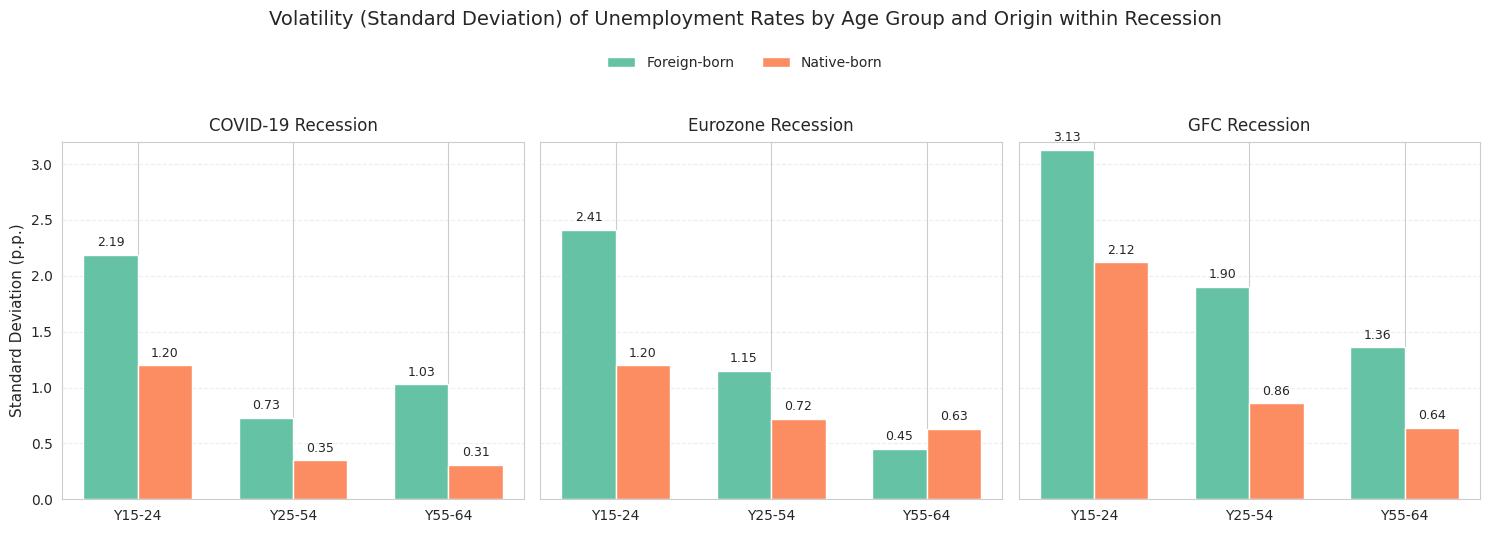

In [18]:
#Figure 6

data = {
    'Recession': ['COVID-19','COVID-19','COVID-19',
                  'Eurozone','Eurozone','Eurozone',
                  'GFC','GFC','GFC'],
    'Age': ['Y15-24','Y25-54','Y55-64']*3,
    'Foreign-born': [2.19,0.73,1.03, 2.41,1.15,0.45, 3.13,1.90,1.36],
    'Native-born':  [1.20,0.35,0.31, 1.20,0.72,0.63, 2.12,0.86,0.64]
}
df = pd.DataFrame(data)

# Long form for grouped bars
long = df.melt(
    id_vars=['Recession','Age'],
    value_vars=['Foreign-born','Native-born'],
    var_name='Origin', value_name='Std Dev'
)

# Ordering and colours
recessions = ['COVID-19','Eurozone','GFC']
ages = ['Y15-24','Y25-54','Y55-64']
palette = {'Foreign-born':'#66c2a5', 'Native-born':'#fc8d62'}


# Figure
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 4.8), sharey=True)
bar_w = 0.35
x = np.arange(len(ages))

# Consistent y-scale across panels
y_max = max(long['Std Dev'].max(), 3.2)

for ax, rec in zip(axes, recessions):
    sub = long[long['Recession'] == rec]
    fb = sub[sub['Origin']=='Foreign-born'].set_index('Age').loc[ages]['Std Dev'].values
    nb = sub[sub['Origin']=='Native-born'].set_index('Age').loc[ages]['Std Dev'].values

    ax.bar(x - bar_w/2, fb, width=bar_w, color=palette['Foreign-born'], label='Foreign-born')
    ax.bar(x + bar_w/2, nb, width=bar_w, color=palette['Native-born'],  label='Native-born')

    # Annotations
    for xi, v in zip(x - bar_w/2, fb):
        ax.text(xi, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=9)
    for xi, v in zip(x + bar_w/2, nb):
        ax.text(xi, v + 0.05, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

    ax.set_title(f"{rec} Recession", fontsize=12, pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(ages, fontsize=10)
    ax.set_ylim(0, y_max)
    ax.grid(axis='y', linestyle='--', alpha=0.35)

axes[0].set_ylabel("Standard Deviation (p.p.)", fontsize=11)

# Single legend above plots
handles = [Patch(facecolor=palette['Foreign-born'], label='Foreign-born'),
           Patch(facecolor=palette['Native-born'],  label='Native-born')]
fig.legend(handles, ['Foreign-born','Native-born'],
           loc='upper center', bbox_to_anchor=(0.5, 1.03),
           ncol=2, frameon=False)

fig.suptitle("Volatility (Standard Deviation) of Unemployment Rates by Age Group and Origin within Recession",
             fontsize=14, y=1.10)
fig.tight_layout(rect=[0, 0, 1, 0.98], w_pad=1.2)
plt.show()






In [19]:
CORE = ["AT","BE","DK","FI","FR","DE","SE"]
PERIPH = ["CY","EL","IT","PT","ES"]



In [20]:
def group_map(code):
    if code in CORE: return "Core"
    if code in PERIPH: return "Periphery"
    return None

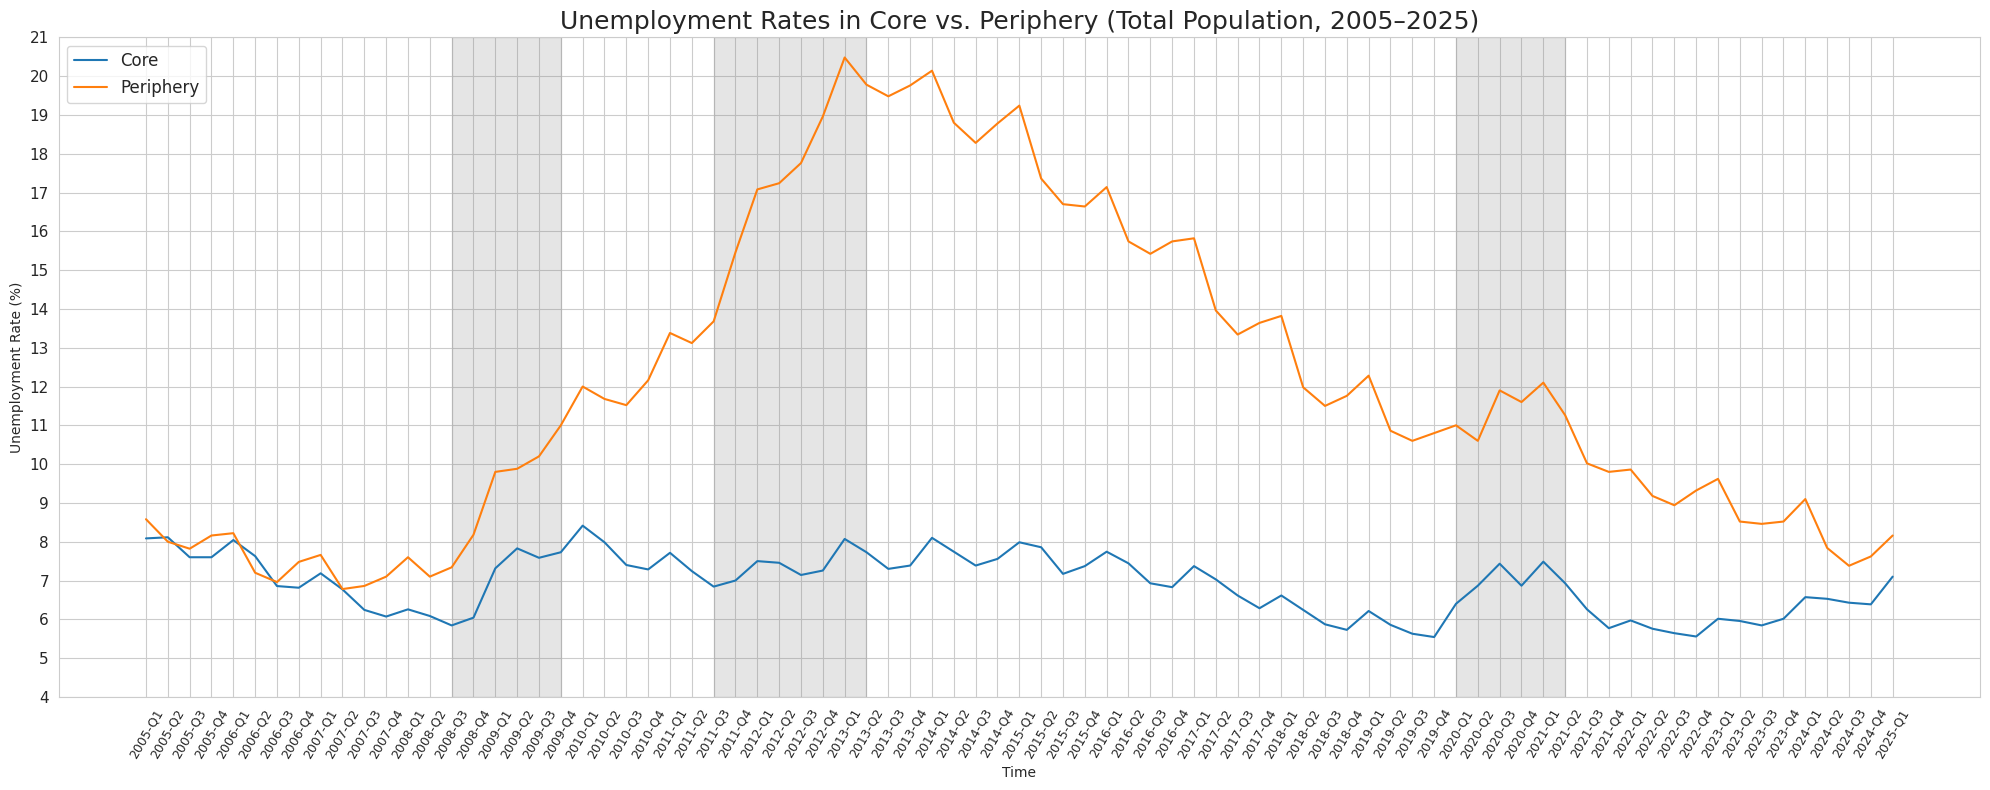

In [21]:
#Figure 7

recessions = [("2008-Q3","2009-Q4"), ("2011-Q3","2013-Q2"), ("2020-Q1","2021-Q2")]

# 1) Filtering
df_tot = df_long.copy()
df_tot["country_group"] = df_tot["geo"].map(group_map)
df_tot = df_tot[
    df_tot.country_group.notna()
    & (df_tot.sex == "T")
    & (df_tot.age == "Y15-64")
    & (df_tot.c_birth == "TOTAL")
    & (df_tot.time_period >= "2005-Q1")
].copy()

# 2) Sorting  quarters and numeric index
df_tot["time_period"] = df_tot["time_period"].str.strip()
quarters = sorted(df_tot["time_period"].unique(), key=lambda x: (int(x[:4]), int(x.split("-Q")[1])))
idx = {q:i for i,q in enumerate(quarters)}
df_tot["time_idx"] = df_tot["time_period"].map(idx)
X = np.arange(len(quarters))

# 3) Aggregating to average per group #arithmetic mean:)
agg_tot = (df_tot.groupby(["time_period","country_group"])["unemployment_rate"]
           .mean().reset_index())
agg_tot["time_idx"] = agg_tot["time_period"].map(idx)

# 4) Plot
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

region_color = {"Core":"tab:blue", "Periphery":"tab:orange"}

for region in ["Core","Periphery"]:
    g = agg_tot[agg_tot.country_group == region].sort_values("time_idx")
    plt.plot(g["time_idx"], g["unemployment_rate"],
             color=region_color[region], label=region)

# 5) Recession shading
y_min = 4
y_max = int(agg_tot["unemployment_rate"].max()) + 1
for start,end in recessions:
    if start in idx and end in idx:
        s, e = idx[start], idx[end]
        plt.fill_between(X, y_min, y_max, where=(X>=s)&(X<=e), color="gray", alpha=0.2)

# 6) Axes/legend
plt.xticks(list(range(len(quarters))), quarters, rotation=60, fontsize=9)
plt.yticks(np.arange(y_min, y_max+0.1, 1), fontsize=11)
plt.ylim(y_min, y_max)
plt.title("Unemployment Rates in Core vs. Periphery (Total Population, 2005–2025)", fontsize=18)
plt.xlabel("Time")
plt.ylabel("Unemployment Rate (%)")
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
plt.grid(True)
plt.show()


In [23]:


# Crisis phases and their quarters
crisis_periods = {
    'GFC':      {'Before':'2006-Q2', 'Start':'2008-Q3', 'End':'2009-Q4', 'After':'2010-Q2'},
    'Eurozone': {'Before':'2006-Q2', 'Start':'2011-Q3', 'End':'2013-Q2', 'After':'2014-Q1'},
    'COVID-19': {'Before':'2006-Q2', 'Start':'2020-Q1', 'End':'2021-Q2', 'After':'2025-Q1'}
}

# 0) Normalizing key strings to avoid mismatches
for col in ["geo","sex","age","c_birth","time_period"]:
    df_long[col] = df_long[col].astype(str).str.strip()

# 1) Filter: TOTAL, Y15–64, sex T
df_cp = df_long[
    (df_long["sex"] == "T") &
    (df_long["age"] == "Y15-64") &
    (df_long["c_birth"] == "TOTAL")
].copy()

# 2) Map Core/Periphery and drop others
df_cp["Country group"] = df_cp["geo"].map(group_map)
df_cp = df_cp.dropna(subset=["Country group"])

# 3) Pre-aggregating  mean by quarter × group
group_q_mean = (df_cp.groupby(["time_period","Country group"])["unemployment_rate"]
                .mean().round(1).reset_index())

# 4) Building the phase rows using the pre-aggregated table
rows = []
for crisis, phases in crisis_periods.items():
    for phase, quarter in phases.items():
        for group in ["Core","Periphery"]:
            val = group_q_mean.loc[
                (group_q_mean["time_period"] == quarter) &
                (group_q_mean["Country group"] == group),
                "unemployment_rate"
            ]
            rate = float(val.iloc[0]) if not val.empty else None
            rows.append({
                "Crisis": crisis,
                "Phase": phase,
                "Quarter": quarter,
                "Country group": group,
                "Rate": rate
            })

df_rates = pd.DataFrame(rows)

# 5) Pivot wide and compute gap (Periphery − Core)
df_wide = (df_rates
           .pivot(index=["Crisis","Phase","Quarter"], columns="Country group", values="Rate")
           .reset_index())
df_wide["Gap (p.p.)"] = (df_wide["Periphery"] - df_wide["Core"]).round(1)

# 6) Summary: start vs end gap
out = []
for crisis in crisis_periods.keys():
    bg = df_wide.loc[(df_wide["Crisis"]==crisis) & (df_wide["Phase"]=="Before"), "Gap (p.p.)"]
    eg = df_wide.loc[(df_wide["Crisis"]==crisis) & (df_wide["Phase"]=="End"), "Gap (p.p.)"]
    bg = float(bg.iloc[0]) if not bg.empty else None
    eg = float(eg.iloc[0])  if not eg.empty else None
    if (bg is not None) and (eg is not None):
        abs_change = round(eg - bg, 1)
        rel_change = f"{round((abs_change/bg)*100, 0):+.0f}%" if bg != 0 else "n/a"
    else:
        abs_change, rel_change = None, "n/a"
    out.append({
        "Crisis": crisis,
        "Gap start (p.p.)": bg,
        "Gap end (p.p.)": eg,
        "Absolute change (p.p.)": abs_change,
        "Relative change (%)": rel_change
    })
df_summary = pd.DataFrame(out)

# 7) Displaying
print("\n--- Detailed rates by phase ---\n")
print(df_wide.to_string(index=False))

print("\n--- Summary gap changes ---\n")
print(df_summary.to_string(index=False))





--- Detailed rates by phase ---

  Crisis  Phase Quarter  Core  Periphery  Gap (p.p.)
COVID-19  After 2025-Q1  7.10       8.20        1.10
COVID-19 Before 2006-Q2  7.60       7.20       -0.40
COVID-19    End 2021-Q2  6.90      11.30        4.40
COVID-19  Start 2020-Q1  6.40      11.00        4.60
Eurozone  After 2014-Q1  8.10      20.10       12.00
Eurozone Before 2006-Q2  7.60       7.20       -0.40
Eurozone    End 2013-Q2  7.70      19.80       12.10
Eurozone  Start 2011-Q3  6.80      13.70        6.90
     GFC  After 2010-Q2  8.00      11.70        3.70
     GFC Before 2006-Q2  7.60       7.20       -0.40
     GFC    End 2009-Q4  7.70      11.00        3.30
     GFC  Start 2008-Q3  5.80       7.30        1.50

--- Summary gap changes ---

  Crisis  Gap start (p.p.)  Gap end (p.p.)  Absolute change (p.p.) Relative change (%)
     GFC             -0.40            3.30                    3.70               -925%
Eurozone             -0.40           12.10                   12.50       

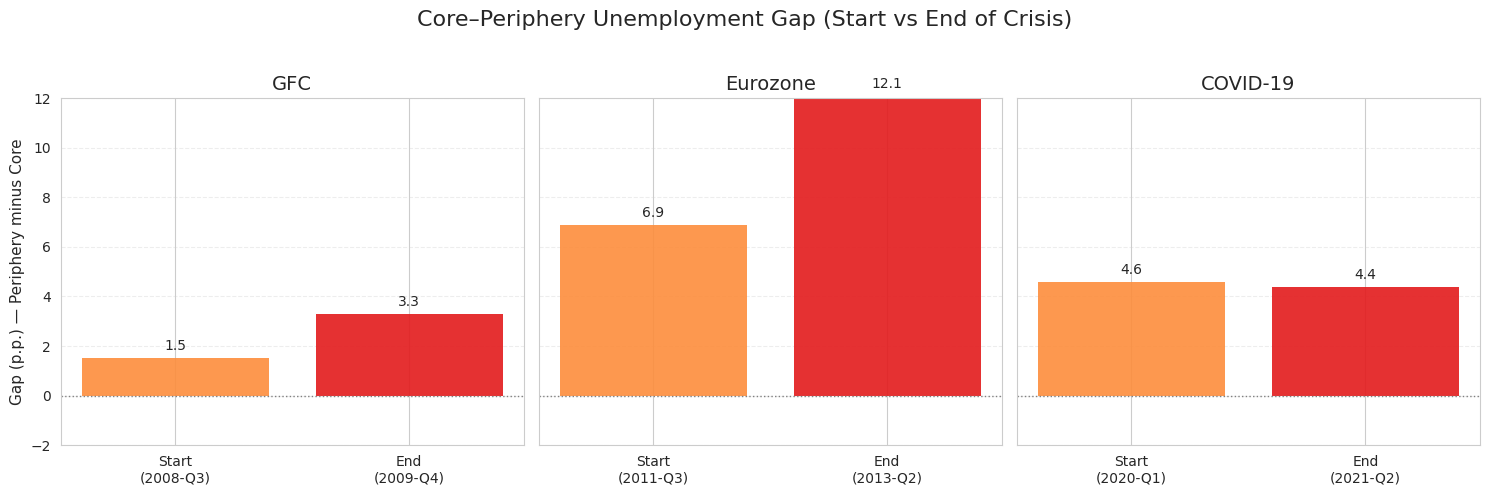

In [24]:
#Figure 8
# Input data from detailed rates table (Periphery − Core gap, p.p.)
data = [
    ("GFC", "Before", -0.4),
    ("GFC", "Start",  1.5),
    ("GFC", "End",    3.3),
    ("GFC", "After",  3.7),

    ("Eurozone", "Before", -0.4),
    ("Eurozone", "Start",   6.9),
    ("Eurozone", "End",    12.1),
    ("Eurozone", "After",  12.0),

    ("COVID-19", "Before", -0.6),
    ("COVID-19", "Start",   4.6),
    ("COVID-19", "End",     4.4),
    ("COVID-19", "After",   4.0),
]
df_gap = pd.DataFrame(data, columns=["Crisis","Phase","Gap"])

# Keep Start & End only
plot_phases = ["Start","End"]
colors = {"Start": "#fd8d3c", "End": "#e31a1c"}

# Labels with quarters
phase_labels = {
    ("GFC","Start"): "Start\n(2008-Q3)",  ("GFC","End"): "End\n(2009-Q4)",
    ("Eurozone","Start"): "Start\n(2011-Q3)", ("Eurozone","End"): "End\n(2013-Q2)",
    ("COVID-19","Start"): "Start\n(2020-Q1)", ("COVID-19","End"): "End\n(2021-Q2)",
}

#Plot
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

crises = ["GFC","Eurozone","COVID-19"]
for ax, crisis in zip(axes, crises):
    sub = df_gap[(df_gap["Crisis"] == crisis) & (df_gap["Phase"].isin(plot_phases))].copy()
    sub = sub.set_index("Phase").loc[plot_phases].reset_index()
    sub["Label"] = [phase_labels[(crisis, p)] for p in sub["Phase"]]

    bars = ax.bar(sub["Label"], sub["Gap"], color=sub["Phase"].map(colors), edgecolor="none", alpha=0.9)

    for bar, val in zip(bars, sub["Gap"]):
        ax.text(bar.get_x() + bar.get_width()/2, val + (0.2 if val >= 0 else -0.3),
                f"{val:.1f}", ha="center", va="bottom" if val >= 0 else "top", fontsize=10)

    ax.axhline(0, color="gray", linestyle="dotted", linewidth=1)
    ax.set_title(crisis, fontsize=14)
    ax.set_ylim(-2, 12)
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    if crisis == "GFC":
        ax.set_ylabel("Gap (p.p.) — Periphery minus Core", fontsize=11)

plt.suptitle("Core–Periphery Unemployment Gap (Start vs End of Crisis)", fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


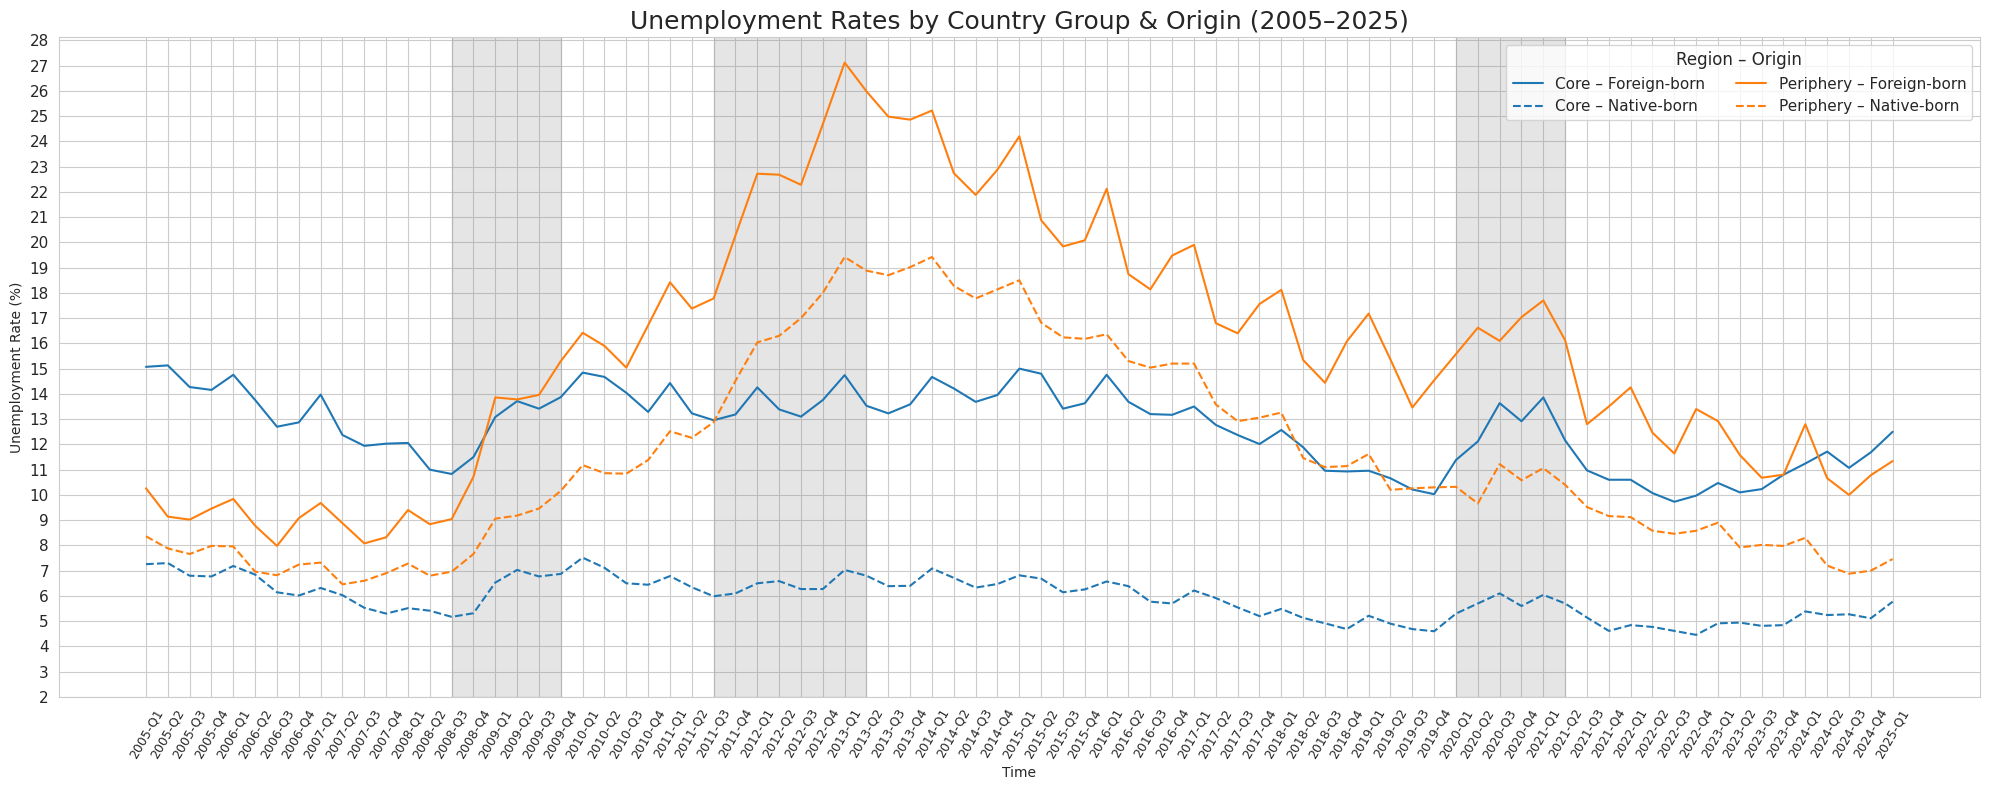

In [26]:
#Figure 9
# 1) Filter
df_cp = df_long.copy()
df_cp["country_group"] = df_cp["geo"].map(group_map)
df_cp = df_cp[
    df_cp["country_group"].notna()
    & (df_cp["sex"] == "T")
    & (df_cp["age"] == "Y15-64")
    & (df_cp["c_birth"].isin(["FOR","NAT"]))
    & (df_cp["time_period"] >= "2005-Q1")
].copy()

# 2) Labels and quarter index
origin_map = {"FOR":"Foreign-born", "NAT":"Native-born"}
df_cp["Origin"] = df_cp["c_birth"].map(origin_map)

df_cp["time_period"] = df_cp["time_period"].astype(str).str.strip()
quarters = sorted(
    df_cp["time_period"].unique(),
    key=lambda x: (int(x[:4]), int(x.split("-Q")[1]))
)
time_to_idx = {q: i for i, q in enumerate(quarters)}
df_cp["time_idx"] = df_cp["time_period"].map(time_to_idx)
X = np.arange(len(quarters))

# 3) Aggregate: simple mean across member countries by quarter × group × origin
agg = (df_cp.groupby(["time_period","country_group","Origin"])["unemployment_rate"]
       .mean().reset_index())
agg["time_idx"] = agg["time_period"].map(time_to_idx)

# 4) Aesthetics
region_color = {"Core":"tab:blue", "Periphery":"tab:orange"}
origin_style = {"Foreign-born":"solid", "Native-born":"dashed"}

# 5) Y-axis
y_min = 2
y_max = float(agg["unemployment_rate"].max()) + 1
y_ticks = np.arange(y_min, y_max, 1)

# 6) Plot
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

for (region, origin), g in agg.groupby(["country_group","Origin"]):
    g = g.sort_values("time_idx")
    plt.plot(
        g["time_idx"], g["unemployment_rate"],
        color=region_color[region],
        linestyle=origin_style[origin],
        label=f"{region} – {origin}"
    )

# 7) Recession shading
for start, end in recessions:
    if (start in time_to_idx) and (end in time_to_idx):
        s, e = time_to_idx[start], time_to_idx[end]
        plt.fill_between(X, y_min, y_max, where=(X>=s)&(X<=e), color="gray", alpha=0.2)

# 8) Axes/legend
plt.xticks(range(len(quarters)), quarters, rotation=60, fontsize=9)
plt.yticks(y_ticks, fontsize=11)
plt.ylim(y_min, y_max)
plt.title("Unemployment Rates by Country Group & Origin (2005–2025)", fontsize=18)
plt.xlabel("Time"); plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Region – Origin", ncol=2, fontsize=11, title_fontsize=12, loc="upper right")
plt.tight_layout(); plt.grid(True); plt.show()


In [31]:
CRISES = {
    "GFC":      {"start":"2008-Q3","end":"2009-Q4"},
    "Eurozone": {"start":"2011-Q3","end":"2013-Q2"},
    "COVID-19": {"start":"2020-Q1","end":"2021-Q2"},
}



# 1) Filter
df = df_long.copy()
df["region"] = df["geo"].map(group_map)
df = df[
    df.region.notna()
    & (df.sex == "T")
    & (df.age == "Y15-64")
    & (df.c_birth.isin(["FOR","NAT"]))
].copy()

# 2) Aggregating mean rates by quarter × region × origin
agg = (df.groupby(["time_period","region","c_birth"])["unemployment_rate"]
         .mean()
         .reset_index())

# Helper: pulling rate for a specific quarter/region/origin
def rate(q, r, o):
    val = agg.loc[(agg.time_period==q)&(agg.region==r)&(agg.c_birth==o),"unemployment_rate"]
    return np.nan if val.empty else round(float(val.iloc[0]), 1)

# 3) Building start/end table for each crisis × region × origin
rows = []
for crisis, w in CRISES.items():
    for r in ["Core","Periphery"]:
        for o in ["FOR","NAT"]:
            start = rate(w["start"], r, o)
            end   = rate(w["end"], r, o)
            rows.append({
                "Crisis": crisis,
                "Region": r,
                "Origin": "Foreign-born" if o=="FOR" else "Native-born",
                "Start (qtr)": w["start"],
                "Start rate": start,
                "End (qtr)": w["end"],
                "End rate": end,
                "Change (p.p.)": None if np.isnan(start) or np.isnan(end) else round(end - start, 1),
            })
start_end = pd.DataFrame(rows)

# 4) Computing within-region foreign–native gaps at start and end
gaps = (start_end
        .pivot(index=["Crisis","Region","Start (qtr)","End (qtr)"],
               columns="Origin", values=["Start rate","End rate"])
        .reset_index())
gaps["Start gap (FOR−NAT)"] = (gaps[("Start rate","Foreign-born")] - gaps[("Start rate","Native-born")]).round(1)
gaps["End gap (FOR−NAT)"]   = (gaps[("End rate","Foreign-born")]   - gaps[("End rate","Native-born")]).round(1)
gaps = gaps[["Crisis","Region","Start (qtr)","End (qtr)","Start gap (FOR−NAT)","End gap (FOR−NAT)"]]


print("\n=== Start/End rates by crisis × region × origin (1 d.p.) ===")
print(start_end.to_string(index=False))

print("\n=== Within-region foreign–native gaps (FOR−NAT) at start and end ===")
print(gaps.to_string(index=False))



=== Start/End rates by crisis × region × origin (1 d.p.) ===
  Crisis    Region       Origin Start (qtr)  Start rate End (qtr)  End rate  Change (p.p.)
     GFC      Core Foreign-born     2008-Q3       10.80   2009-Q4     13.90           3.10
     GFC      Core  Native-born     2008-Q3        5.20   2009-Q4      6.90           1.70
     GFC Periphery Foreign-born     2008-Q3        9.00   2009-Q4     15.30           6.30
     GFC Periphery  Native-born     2008-Q3        7.00   2009-Q4     10.20           3.20
Eurozone      Core Foreign-born     2011-Q3       13.00   2013-Q2     13.50           0.50
Eurozone      Core  Native-born     2011-Q3        6.00   2013-Q2      6.80           0.80
Eurozone Periphery Foreign-born     2011-Q3       17.80   2013-Q2     26.00           8.20
Eurozone Periphery  Native-born     2011-Q3       12.90   2013-Q2     18.90           6.00
COVID-19      Core Foreign-born     2020-Q1       11.40   2021-Q2     12.20           0.80
COVID-19      Core  Native-b

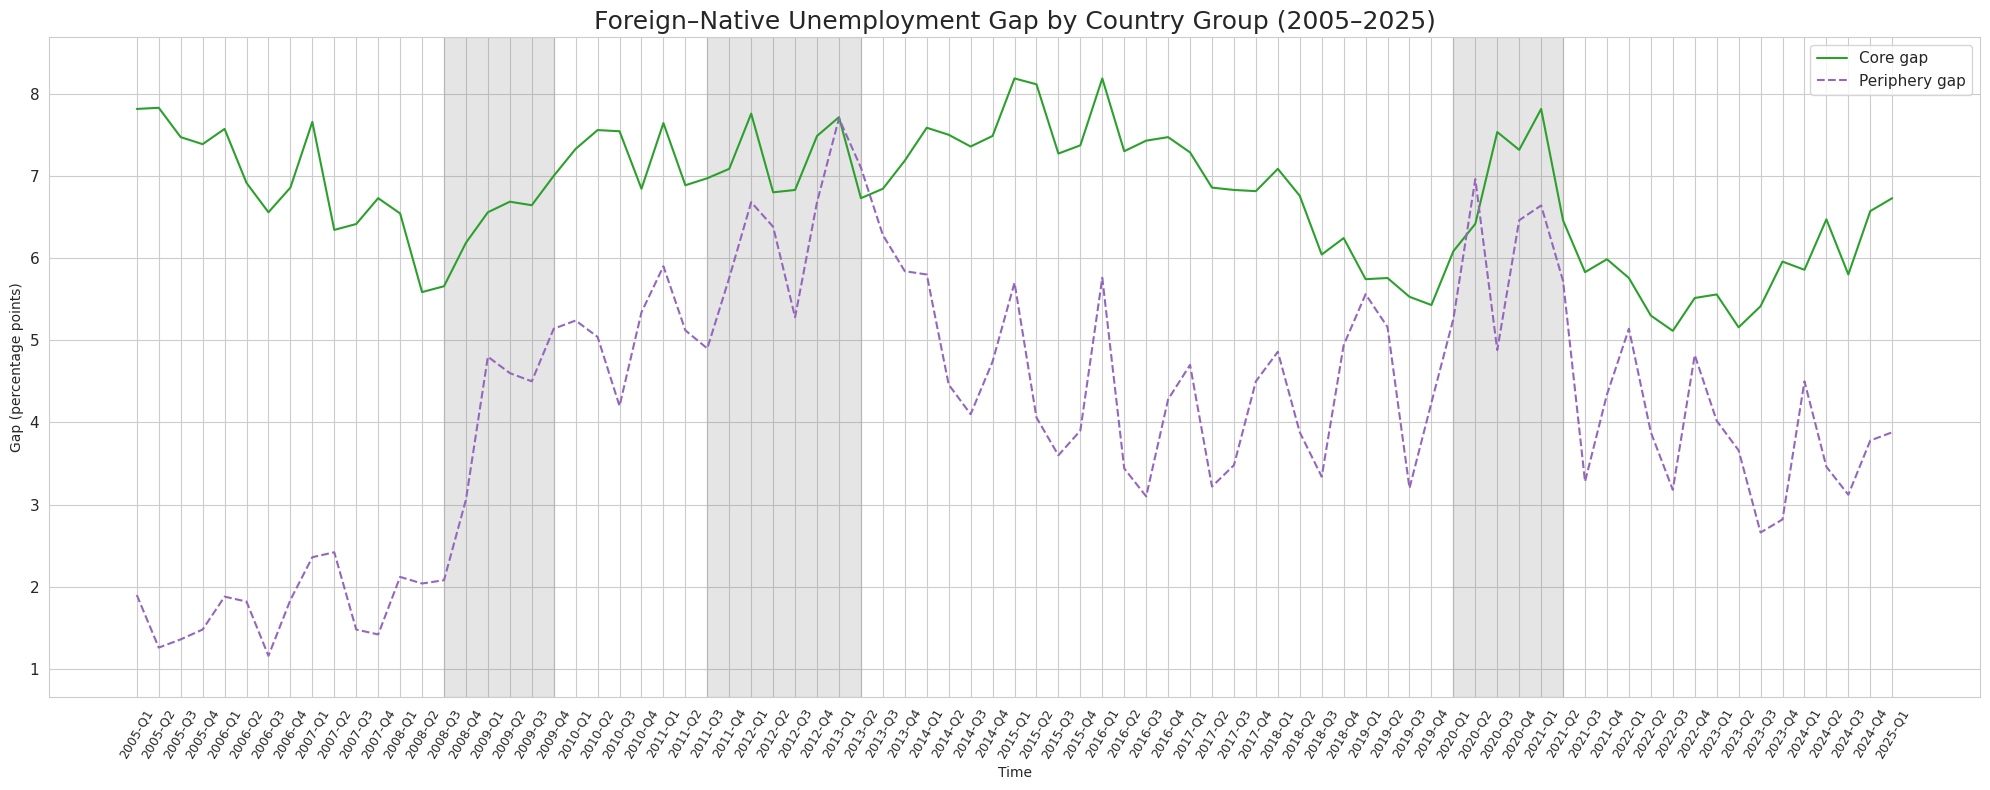

In [32]:
# Figure 10

# 1) Filter
df_gap = df_long.copy()
df_gap["country_group"] = df_gap["geo"].map(group_map)
df_gap = df_gap[
    df_gap["country_group"].notna()
    & (df_gap["sex"] == "T")
    & (df_gap["age"] == "Y15-64")
    & (df_gap["c_birth"].isin(["FOR","NAT"]))
    & (df_gap["time_period"] >= "2005-Q1")
].copy()

# 2) Quarter index
df_gap["time_period"] = df_gap["time_period"].astype(str).str.strip()
quarters = sorted(
    df_gap["time_period"].unique(),
    key=lambda x: (int(x[:4]), int(x.split("-Q")[1]))
)
time_to_idx = {q: i for i, q in enumerate(quarters)}
df_gap["time_idx"] = df_gap["time_period"].map(time_to_idx)
X = np.arange(len(quarters))

# 3) Aggregating rates and computing gap = FOR − NAT by quarter × group
agg = (df_gap.groupby(["time_period","country_group","c_birth"])["unemployment_rate"]
       .mean().reset_index())

wide = (agg.pivot(index=["time_period","country_group"], columns="c_birth", values="unemployment_rate")
          .reset_index())
wide["gap"] = wide["FOR"] - wide["NAT"]
wide["time_idx"] = wide["time_period"].map(time_to_idx)

# 4) Plot
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

region_color = {"Core":"tab:green", "Periphery":"tab:purple"}
line_style   = {"Core":"solid",     "Periphery":"dashed"}

for region in ["Core","Periphery"]:
    g = wide[wide["country_group"] == region].sort_values("time_idx")
    plt.plot(
        g["time_idx"], g["gap"],
        color=region_color[region],
        linestyle=line_style[region],
        label=f"{region} gap"
    )

# 5) Recession shading
y_min = float(np.nanmin(wide["gap"])) - 0.5
y_max = float(np.nanmax(wide["gap"])) + 0.5
for start, end in recessions:
    if (start in time_to_idx) and (end in time_to_idx):
        s, e = time_to_idx[start], time_to_idx[end]
        plt.fill_between(X, y_min, y_max, where=(X>=s)&(X<=e), color="gray", alpha=0.2)

# 6) Axes/legend
plt.xticks(range(len(quarters)), quarters, rotation=60, fontsize=9)
plt.yticks(fontsize=11)
plt.ylim(y_min, y_max)
plt.axhline(0, linewidth=1)
plt.title("Foreign–Native Unemployment Gap by Country Group (2005–2025)", fontsize=18)
plt.xlabel("Time"); plt.ylabel("Gap (percentage points)")
plt.legend(fontsize=11)
plt.tight_layout(); plt.grid(True); plt.show()
